In [219]:
from keras.src.ops import normalize
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
import seaborn as sns
import math
from scipy import integrate
from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

plt.rcParams['figure.figsize'] = [15, 7]


In [220]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

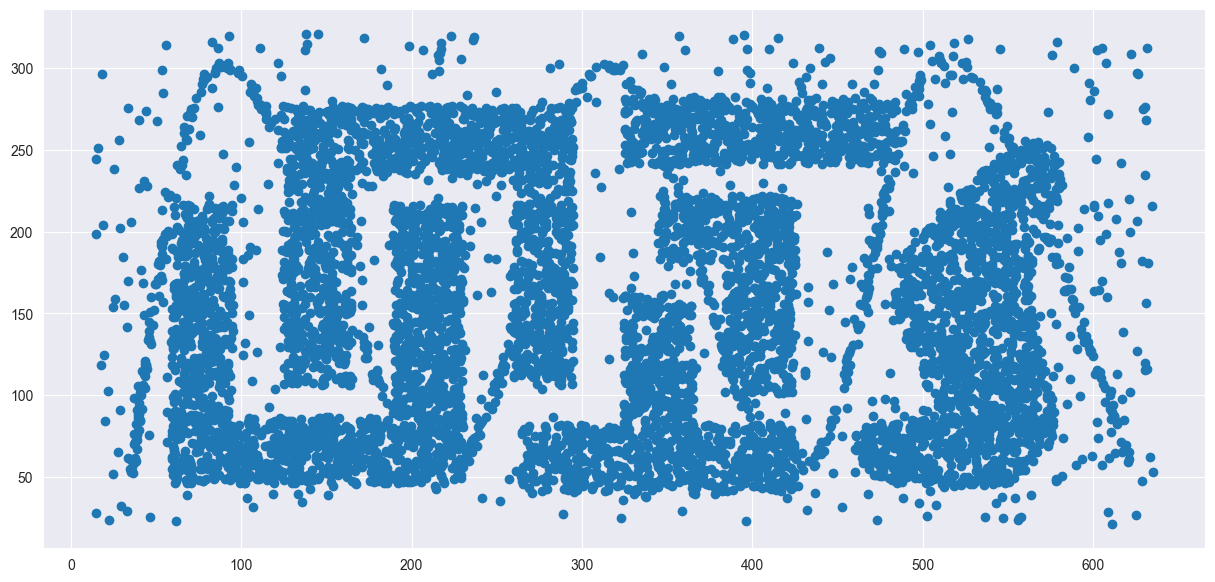

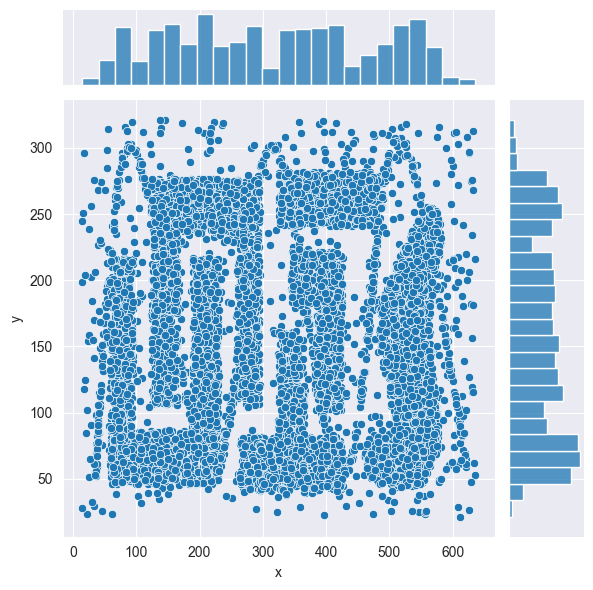

In [221]:
plt.scatter(df['x'],df['y'])
sns.jointplot(x=df['x'],y=df['y'],data=df)
plt.show()

In [222]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [223]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

(0.5991297624170264, 7.607431071267095, 19.82683798486753)
0.07743057835345878
0.9623139820528492


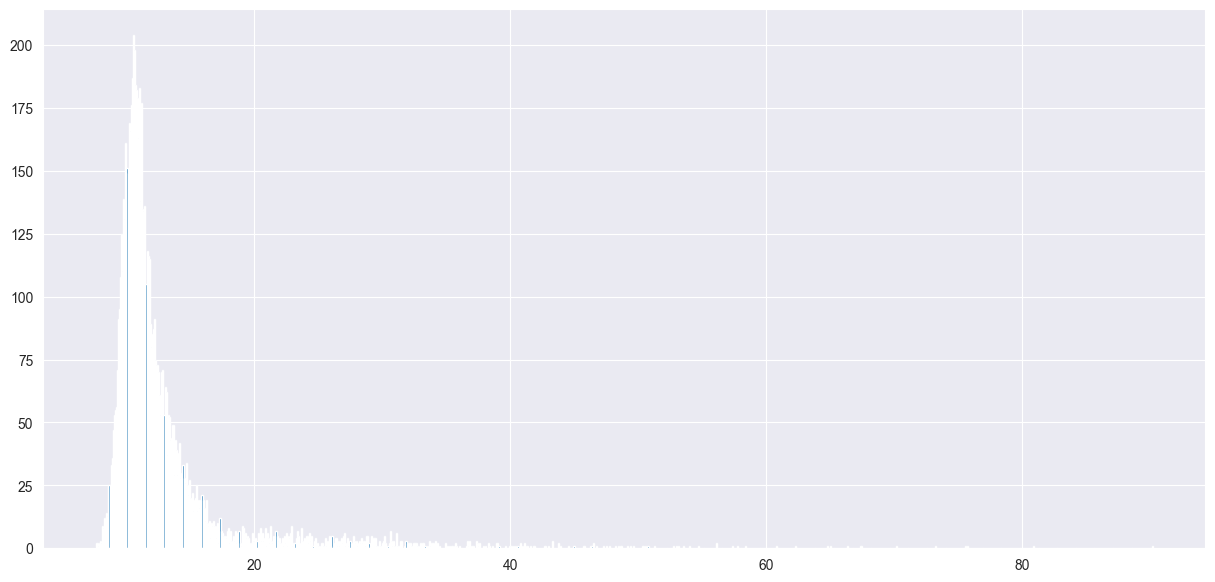

In [228]:
q3 = np.percentile(arr,95)
end = scipy.stats.gamma.fit(arr)
print(end)
means = 1 / np.mean(arr)
print(means)
rands = scipy.stats.expon.rvs(loc=0,scale=5.30736,size=1000)
plt.hist(arr,bins=1000)
print(scipy.stats.expon.cdf(17.4,loc=0,scale=5.30736))
#plt.hist(rands)
plt.show()

In [225]:
find95 = np.percentile(arr,91)
print(find95)
outs = arr > find95
print(outs)

17.495471326757126
[False False  True ... False False False]


656 720


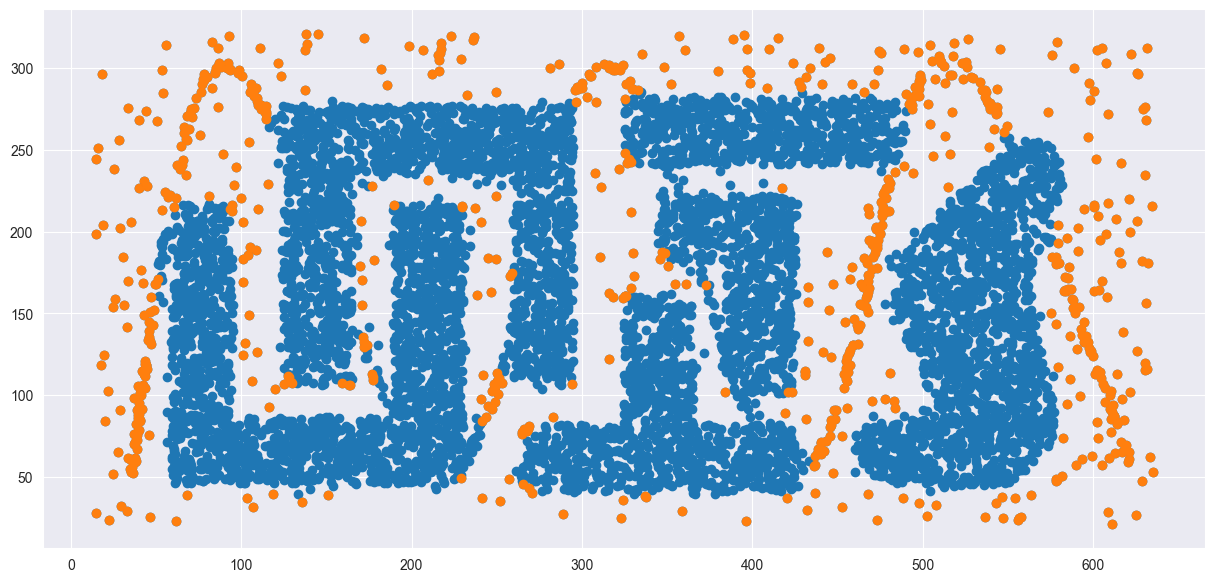

In [226]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[outs,0],X[outs,1])
tmphol = []
tmphol = y[outs] == 6
print(tmphol.sum(),outs.sum())
plt.show()